In [1]:
"""
                                      !!!   QUIZ 2   !!!
# Bir alt hücrede 0-9 arası sayıları içeren veri seti verilmiştir.
Bu veri setini batchler halinde (iterator, generator kullanarak) bir tane scikit learn ML modelini eğitiniz.



# Aşağıda verilen obje tabanlı basit bir ML proje scriptine uyarlayınız.
 (Iterator, Generator, Map, Lambda)
 > Veri setini yükle.
 > Batchler halinde getir.
 > Model değiştir. Sınıflandırma için uygun classifier bul.
 > Model eğitimi ve test.
 > Doğruluk (Accuracy) , Kesinlik(Precision) , Duyarlılık(Recall) ve F1 Score değerlerini ekrana yazdırınız

# Süre 120 dk
# Başarılar:)



## Derin öğrenme ya da farklı yaklaşımlar da denenebilir. Her çalışma değerlendirilecektir. Bu quiz için
ML modeli kullanmak daha kolay olacaktır.
"""

'\n                                      !!!   QUIZ 2   !!!\n# Bir alt hücrede 0-9 arası sayıları içeren veri seti verilmiştir.\nBu veri setini batchler halinde (iterator, generator kullanarak) bir tane scikit learn ML modelini eğitiniz.\n\n\n\n# Aşağıda verilen obje tabanlı basit bir ML proje scriptine uyarlayınız.\n (Iterator, Generator, Map, Lambda)\n > Veri setini yükle.\n > Batchler halinde getir.\n > Model değiştir. Sınıflandırma için uygun classifier bul.\n > Model eğitimi ve test.\n > Doğruluk (Accuracy) , Kesinlik(Precision) , Duyarlılık(Recall) ve F1 Score değerlerini ekrana yazdırınız\n\n# Süre 120 dk\n# Başarılar:)\n\n\n\n## Derin öğrenme ya da farklı yaklaşımlar da denenebilir. Her çalışma değerlendirilecektir. Bu quiz için\nML modeli kullanmak daha kolay olacaktır.\n'

In [2]:
from sklearn import datasets
mnist = datasets.load_digits()

## !!!! BU VERİYİ KULLANMALISINIZ !!!

X=mnist['data']
print(X.shape)

y=mnist['target'] # 0,1,2,3,4,5 ...9
print(y.shape)

(1797, 64)
(1797,)


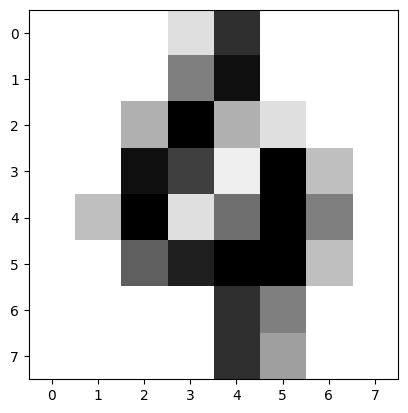

In [3]:
import matplotlib
import matplotlib.pyplot as plt

some_digit = X[100]
some_digit_image = some_digit.reshape(8, 8)

plt.imshow(some_digit_image, cmap = matplotlib.cm.binary, interpolation = "nearest")
plt.axis("on")
plt.show()

In [4]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import numpy as np
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

In [7]:
class MnistClassifier:
    def __init__(self, X, y, batch_size=32):
        self.X = X
        self.y = y
        self.batch_size = batch_size
        self.num_samples = X.shape[0]
        self.num_batches = -(-self.num_samples // self.batch_size)  # Yukarı yuvarlama işlemi
        self.current_batch = 0

    def __iter__(self):
        return self

    def __next__(self):
        if self.current_batch < self.num_batches:
            start_idx = self.current_batch * self.batch_size
            end_idx = min((self.current_batch + 1) * self.batch_size, self.num_samples)
            self.current_batch += 1
            return self.X[start_idx:end_idx], self.y[start_idx:end_idx]
        else:
            raise StopIteration

    def preprocess_data(self, X, y):
        # Veriyi normalize etme[0,1]
        X_normalized = map(lambda x: x / 255.0, X)
        return np.array(list(X_normalized)), y

    def apply_preprocessing(self, X_train, y_train, X_test, y_test):
        X_train_processed, y_train_processed = self.preprocess_data(X_train, y_train)
        X_test_processed, y_test_processed = self.preprocess_data(X_test, y_test)
        return X_train_processed, y_train_processed, X_test_processed, y_test_processed

    def train_model(self, X_train, y_train):
        model = SGDClassifier()
        for batch_X, batch_y in self:
            model.partial_fit(batch_X, batch_y, classes=np.unique(self.y))
        return model

    def evaluate_model(self, model, X_test, y_test):
        y_pred = model.predict(X_test)
        accuracy = accuracy_score(y_test, y_pred)
        precision = precision_score(y_test, y_pred, average='weighted')
        recall = recall_score(y_test, y_pred, average='weighted')
        f1 = f1_score(y_test, y_pred, average='weighted')

        #conf matrix
        self.confusion_matrix(model, X_test, y_test)

        return accuracy, precision, recall, f1

    def confusion_matrix(self, model, X_test, y_test):
        y_pred = model.predict(X_test)

        cm = confusion_matrix(y_test, y_pred)

        plt.figure(figsize=(8, 6))
        sns.heatmap(cm, annot=True, cmap='Purples', cbar=True)
        plt.title('Confusion Matrix')
        plt.xlabel('Predicted Labels')
        plt.ylabel('True Labels')
        plt.show()


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


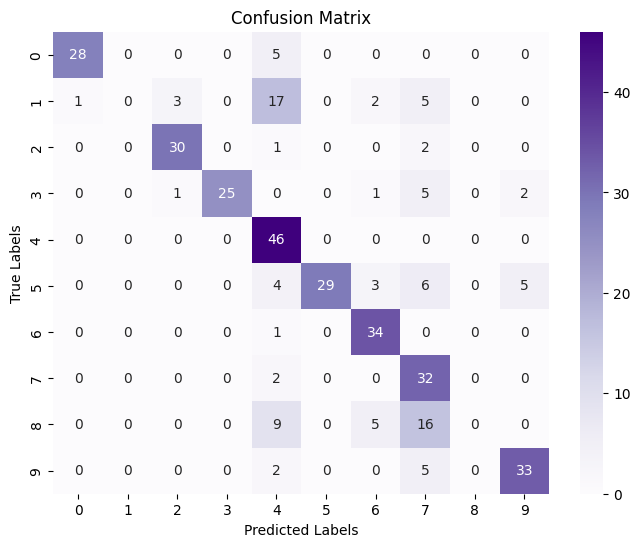

Model Değerlendirmesi
Accuracy: 71.39% - Precision: 66.96% - Recall: 71.39% - F1 Score: 66.48%


In [8]:
# Veriyi  ayır
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Classifier
classifier = MnistClassifier(X_train, y_train)
X_train_processed, y_train_processed, X_test_processed, y_test_processed = classifier.apply_preprocessing(X_train, y_train, X_test, y_test)

model = classifier.train_model(X_train_processed, y_train_processed) # Modeli eğit

accuracy, precision, recall, f1 = classifier.evaluate_model(model, X_test_processed, y_test_processed)
print("Model Değerlendirmesi")
print("Accuracy: {:.2f}%".format(accuracy * 100) + " - Precision: {:.2f}%".format(precision * 100) +" - Recall: {:.2f}%".format(recall * 100)
     +" - F1 Score: {:.2f}%".format(f1 * 100))